# Tensorflow卷积相关函数

#4 优化器类

#2 激活函数

#2 激活函数

##2.1 平滑非线性激活函数
sigmoid、tanh、elu、softplus，softsign

##2.2 连续但不是处处可导激活函数
relu、relu6、crelu、relu_x

#2.3 随机正则化激活单元
dropout

/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


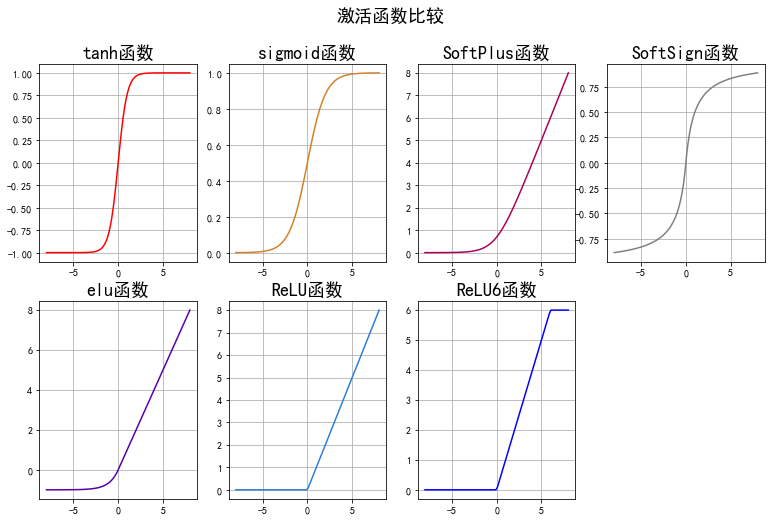

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
N = 100
activate_funcs = [
    [tf.nn.tanh, 'tanh函数'],
    [tf.nn.sigmoid, 'sigmoid函数'],
    [tf.nn.softplus, 'SoftPlus函数'],
    [tf.nn.softsign, 'SoftSign函数'],
    [tf.nn.elu, 'elu函数'],
    [tf.nn.relu, 'ReLU函数'],
    [tf.nn.relu6, 'ReLU6函数']
]
activate_funcs_length = len(activate_funcs)

x = tf.placeholder(tf.float32, [N])
X = np.linspace(-8, 8, N)

clrs = []  # 颜色
for c in np.linspace(16711680, 255, activate_funcs_length):
    clrs.append("#{:06X}".format(int(c), 2))



row = 2
col = 4
plt.figure(figsize=(13, 8), facecolor='w')
with tf.Session() as sess:
    for index, vec in enumerate(activate_funcs):
        plt.subplot(row, col, index+1)
        yy = sess.run(vec[0](x), feed_dict={x : X})
        plt.plot(X, yy, c=clrs[index])
        plt.grid(True)
        plt.title(vec[1], fontsize=18)
    plt.legend(loc='best')

    plt.suptitle('激活函数比较', fontsize=18)
    plt.show()

#3 损失函数

##3.1 回归损失
- tf.nn.l2_loss：误差平方和

##3.2 分类损失

###3.2.1 交叉熵损失：
所谓logits，就是$\omega{x} + b$
- tf.nn.sigmoid_cross_entropy_with_logits:后面使用sigmoid激活函数。如果令$x=logits=\omega{x}+b,z=targets$，那么tensorflow里面的这个交叉熵损失内部就是计算$z*log[sigmoid(x)] + (1-z) * -log[1-sigmoid(x)]$，适用于二分类问题
- tf.nn.softmax_cross_entropy_with_logits:后面使用softmax，适用于多类单标签
- tf.nn.sparse_softmax_cross_entropy_with_logits:softmax_cross_entropy_with_logits的易用版本.内部实现了onehot编码
- tf.nn.weighted_cross_entropy_with_logits:

#4 优化器类